##### 【Problem 1 】 Creating a code that determines the initial value of weight

In [1]:
import numpy as np

def initialize_weights(input_dim, output_dim, sigma=0.01):
    """
    重みの初期値をガウス分布に基づいて決定する。

    Parameters
    ----------
    input_dim : int
        入力層のノード数
    output_dim : int
        出力層のノード数
    sigma : float, default 0.01
        ガウス分布の標準偏差

    Returns
    -------
    W : ndarray, shape (output_dim, input_dim)
        重み
    b : ndarray, shape (output_dim,)
        バイアス
    """
    W = sigma * np.random.randn(output_dim, input_dim)
    b = np.zeros(output_dim)
    return W, b

# Example usage:
input_features = 784  # MNIST image size (flattened)
hidden_units = 100
output_units = 10   # 10 classes (digits 0-9)

# Initialize weights and biases for the first layer (input to hidden)
W1, b1 = initialize_weights(input_features, hidden_units)
print("Shape of W1:", W1.shape)
print("Shape of b1:", b1.shape)

# Initialize weights and biases for the second layer (hidden to output)
W2, b2 = initialize_weights(hidden_units, output_units)
print("Shape of W2:", W2.shape)
print("Shape of b2:", b2.shape)

Shape of W1: (100, 784)
Shape of b1: (100,)
Shape of W2: (10, 100)
Shape of b2: (10,)


##### 【Problem 2 】 Forward propagation implementation

In [2]:
import numpy as np

def sigmoid(A):
    """
    Sigmoid activation function.

    Parameters
    ----------
    A : ndarray, shape (batch_size, n_nodes)
        Input array

    Returns
    -------
    Z : ndarray, shape (batch_size, n_nodes)
        Output array
    """
    return 1 / (1 + np.exp(-A))

def tanh(A):
    """
    Hyperbolic tangent activation function.

    Parameters
    ----------
    A : ndarray, shape (batch_size, n_nodes)
        Input array

    Returns
    -------
    Z : ndarray, shape (batch_size, n_nodes)
        Output array
    """
    return np.tanh(A)

def softmax(A):
    """
    Softmax activation function.

    Parameters
    ----------
    A : ndarray, shape (batch_size, n_output)
        Input array

    Returns
    -------
    Z : ndarray, shape (batch_size, n_output)
        Output array (probabilities for each class)
    """
    exp_A = np.exp(A)
    sum_exp_A = np.sum(exp_A, axis=1, keepdims=True)
    Z = exp_A / sum_exp_A
    return Z

def forward_propagation(X, W1, B1, W2, B2, W3, B3, activation='sigmoid'):
    """
    Performs forward propagation for a three-layer neural network.

    Parameters
    ----------
    X : ndarray, shape (batch_size, n_features)
        Input feature vector
    W1 : ndarray, shape (n_features, n_nodes1)
        Weight matrix for the first layer
    B1 : ndarray, shape (n_nodes1,)
        Bias vector for the first layer
    W2 : ndarray, shape (n_nodes1, n_nodes2)
        Weight matrix for the second layer
    B2 : ndarray, shape (n_nodes2,)
        Bias vector for the second layer
    W3 : ndarray, shape (n_nodes2, n_output)
        Weight matrix for the third layer
    B3 : ndarray, shape (n_output,)
        Bias vector for the third layer
    activation : str, default 'sigmoid'
        Activation function to use for the first and second layers ('sigmoid' or 'tanh')

    Returns
    -------
    Z3 : ndarray, shape (batch_size, n_output)
        Output of the third layer (probabilities)
    cache : tuple
        A tuple containing the intermediate values (A1, Z1, A2, Z2, A3) for backpropagation
    """
    # 1st layer
    A1 = X @ W1 + B1  # (batch_size, n_features) @ (n_features, n_nodes1) + (n_nodes1,) -> (batch_size, n_nodes1)
    if activation == 'sigmoid':
        Z1 = sigmoid(A1) # (batch_size, n_nodes1)
    elif activation == 'tanh':
        Z1 = tanh(A1)    # (batch_size, n_nodes1)
    else:
        raise ValueError("Invalid activation function. Choose 'sigmoid' or 'tanh'.")

    # 2nd layer
    A2 = Z1 @ W2 + B2  # (batch_size, n_nodes1) @ (n_nodes1, n_nodes2) + (n_nodes2,) -> (batch_size, n_nodes2)
    if activation == 'sigmoid':
        Z2 = sigmoid(A2) # (batch_size, n_nodes2)
    elif activation == 'tanh':
        Z2 = tanh(A2)    # (batch_size, n_nodes2)
    else:
        raise ValueError("Invalid activation function. Choose 'sigmoid' or 'tanh'.")

    # 3rd layer (output layer)
    A3 = Z2 @ W3 + B3  # (batch_size, n_nodes2) @ (n_nodes2, n_output) + (n_output,) -> (batch_size, n_output)
    Z3 = softmax(A3)   # (batch_size, n_output)

    cache = (A1, Z1, A2, Z2, A3)
    return Z3, cache

# Example usage with dummy weights and biases
batch_size = 20
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

# Initialize dummy weights and biases (replace with your actual initialization)
W1 = np.random.randn(n_features, n_nodes1)
B1 = np.zeros(n_nodes1)
W2 = np.random.randn(n_nodes1, n_nodes2)
B2 = np.zeros(n_nodes2)
W3 = np.random.randn(n_nodes2, n_output)
B3 = np.zeros(n_output)
X = np.random.rand(batch_size, n_features)

# Perform forward propagation with sigmoid activation
Z3_sigmoid, cache_sigmoid = forward_propagation(X, W1, B1, W2, B2, W3, B3, activation='sigmoid')
print("Output Z3 (sigmoid):", Z3_sigmoid.shape)
print("Cache (sigmoid) length:", len(cache_sigmoid))

# Perform forward propagation with tanh activation
Z3_tanh, cache_tanh = forward_propagation(X, W1, B1, W2, B2, W3, B3, activation='tanh')
print("\nOutput Z3 (tanh):", Z3_tanh.shape)
print("Cache (tanh) length:", len(cache_tanh))

Output Z3 (sigmoid): (20, 10)
Cache (sigmoid) length: 5

Output Z3 (tanh): (20, 10)
Cache (tanh) length: 5


##### 【Problem 3 】 Implementation of cross entropy error

In [5]:
import numpy as np

def cross_entropy_error(y, Z):
    """
    Calculates the cross-entropy error (loss) for multi-class classification.

    Parameters
    ----------
    y : ndarray, shape (batch_size, n_output)
        One-hot encoded correct answer labels
    Z : ndarray, shape (batch_size, n_output)
        Probability distribution of predictions from the output layer

    Returns
    -------
    loss : float
        Average cross-entropy error over the batch
    """
    batch_size = y.shape[0]
    # Add a small constant to prevent log(0) errors
    epsilon = 1e-7
    loss = -np.sum(y * np.log(Z + epsilon)) / batch_size
    return loss

# Example usage:
batch_size = 20
n_output = 10

# Dummy one-hot encoded correct labels
y_true = np.zeros((batch_size, n_output))
y_true[np.arange(batch_size), np.random.randint(0, n_output, batch_size)] = 1

# Dummy prediction probabilities
y_pred = np.random.rand(batch_size, n_output)
y_pred /= np.sum(y_pred, axis=1, keepdims=True) # Normalize to probabilities

loss = cross_entropy_error(y_true, y_pred)
print("Cross-entropy error:", loss)

Cross-entropy error: 2.5285201405441375


##### 【Problem 4 】 Back propagation implementation

In [6]:
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

class GetMiniBatch:
    """
    Iterator to get mini-batches for training.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data.
    y : ndarray, shape (n_samples, n_output)
        Correct answer values (one-hot encoded).
    batch_size : int, default 20
        Batch size.
    seed : int, default 0
        Seed for NumPy random number generation.
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        batch_X = self._X[p0:p1]
        batch_y = self._y[p0:p1]
        self._counter += 1
        return batch_X, batch_y

def cross_entropy_error(y, Z):
    """
    Calculates the cross-entropy error (loss) for multi-class classification.

    Parameters
    ----------
    y : ndarray, shape (batch_size, n_output)
        One-hot encoded correct answer labels.
    Z : ndarray, shape (batch_size, n_output)
        Probability distribution of predictions from the output layer.

    Returns
    -------
    loss : float
        Average cross-entropy error over the batch.
    """
    batch_size = y.shape[0]
    epsilon = 1e-7
    loss = -np.sum(y * np.log(Z + epsilon)) / batch_size
    return loss

class ThreeLayerNeuralNetworkBackpropagation:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, learning_rate=0.01, activation='sigmoid'):
        """
        Initializes the three-layer neural network for backpropagation.

        Parameters
        ----------
        n_features : int
            Number of input features.
        n_nodes1 : int
            Number of nodes in the first hidden layer.
        n_nodes2 : int
            Number of nodes in the second hidden layer.
        n_output : int
            Number of output nodes (number of classes).
        learning_rate : float, default 0.01
            Learning rate for gradient descent.
        activation : str, default 'sigmoid'
            Activation function for the hidden layers ('sigmoid' or 'tanh').
        """
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate
        self.activation = activation
        self.W1 = np.random.randn(n_features, n_nodes1) * 0.01  # Weights for the first layer
        self.B1 = np.zeros(n_nodes1)                             # Biases for the first layer
        self.W2 = np.random.randn(n_nodes1, n_nodes2) * 0.01  # Weights for the second layer
        self.B2 = np.zeros(n_nodes2)                             # Biases for the second layer
        self.W3 = np.random.randn(n_nodes2, n_output) * 0.01   # Weights for the output layer
        self.B3 = np.zeros(n_output)                              # Biases for the output layer

    def sigmoid_derivative(self, Z):
        """
        Calculates the derivative of the sigmoid function.

        Parameters
        ----------
        Z : ndarray
            Output of the sigmoid function.

        Returns
        -------
        ndarray
            Derivative of the sigmoid function.
        """
        return Z * (1 - Z)

    def tanh_derivative(self, Z):
        """
        Calculates the derivative of the hyperbolic tangent function.

        Parameters
        ----------
        Z : ndarray
            Output of the tanh function.

        Returns
        -------
        ndarray
            Derivative of the tanh function.
        """
        return 1 - Z**2

    def forward(self, X):
        """
        Performs forward propagation through the network.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (batch_size, n_output)
            Output probabilities from the softmax layer.
        """
        self.A1 = X @ self.W1 + self.B1
        if self.activation == 'sigmoid':
            self.Z1 = 1 / (1 + np.exp(-self.A1))
        elif self.activation == 'tanh':
            self.Z1 = np.tanh(self.A1)
        else:
            raise ValueError("Invalid activation function.")

        self.A2 = self.Z1 @ self.W2 + self.B2
        if self.activation == 'sigmoid':
            self.Z2 = 1 / (1 + np.exp(-self.A2))
        elif self.activation == 'tanh':
            self.Z2 = np.tanh(self.A2)
        else:
            raise ValueError("Invalid activation function.")

        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = np.exp(self.A3) / np.sum(np.exp(self.A3), axis=1, keepdims=True)

        return self.Z3

    def backward(self, X, y):
        """
        Performs backpropagation to calculate gradients and update parameters.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data for the current batch.
        y : ndarray, shape (batch_size, n_output)
            One-hot encoded true labels for the current batch.
        """
        batch_size = X.shape[0]

        # Output layer
        dA3 = (self.Z3 - y) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3

        # Second layer
        dZ2 = dA3 @ self.W3.T
        if self.activation == 'sigmoid':
            dA2 = dZ2 * self.sigmoid_derivative(self.Z2)
        elif self.activation == 'tanh':
            dA2 = dZ2 * self.tanh_derivative(self.Z2)
        else:
            raise ValueError("Invalid activation function.")
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2

        # First layer
        dZ1 = dA2 @ self.W2.T
        if self.activation == 'sigmoid':
            dA1 = dZ1 * self.sigmoid_derivative(self.Z1)
        elif self.activation == 'tanh':
            dA1 = dZ1 * self.tanh_derivative(self.Z1)
        else:
            raise ValueError("Invalid activation function.")
        dB1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1

        # Update weights and biases (Stochastic Gradient Descent)
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def train(self, X_train, y_train, epochs=1, batch_size=20, X_val=None, y_val=None, verbose=True):
        """
        Trains the neural network.

        Parameters
        ----------
        X_train : ndarray, shape (n_samples, n_features)
            Training data features.
        y_train : ndarray, shape (n_samples, n_output)
            One-hot encoded training data labels.
        epochs : int, default 1
            Number of training epochs.
        batch_size : int, default 20
            Size of each mini-batch.
        X_val : ndarray, shape (n_val_samples, n_features), default None
            Validation data features.
        y_val : ndarray, shape (n_val_samples, n_output), default None
            One-hot encoded validation data labels.
        verbose : bool, default True
            Whether to print training progress.
        """
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=batch_size)

        for epoch in range(epochs):
            for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                # Forward propagation
                y_pred = self.forward(mini_X_train)

                # Backward propagation and parameter update
                self.backward(mini_X_train, mini_y_train)

                if verbose and i % 100 == 0:
                    loss = cross_entropy_error(mini_y_train, y_pred)
                    print(f"Epoch {epoch+1}, Mini-batch {i+1}, Loss: {loss:.4f}")

            if verbose and X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = cross_entropy_error(y_val, y_val_pred)
                accuracy = self.evaluate(X_val, y_val)
                print(f"Epoch {epoch+1} Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """
        Predicts the class labels for the given input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels (integers).
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the accuracy of the model on the test data.

        Parameters
        ----------
        X_test : ndarray, shape (n_test_samples, n_features)
            Test data features.
        y_test : ndarray, shape (n_test_samples, n_output)
            One-hot encoded test data labels.

        Returns
        -------
        float
            Accuracy of the model on the test data.
        """
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
        return accuracy

if __name__ == '__main__':
    # Load MNIST data
    (X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
    X_train = X_train_raw.reshape(-1, 784) / 255.0
    X_test = X_test_raw.reshape(-1, 784) / 255.0

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(y_train_raw[:, np.newaxis]).toarray()
    y_test = enc.transform(y_test_raw[:, np.newaxis]).toarray()

    # Split training data into training and validation sets
    X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    # Instantiate the neural network
    nn = ThreeLayerNeuralNetworkBackpropagation(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, activation='tanh')

    # Train the network
    nn.train(X_train_part, y_train_part, epochs=10, batch_size=20, X_val=X_val, y_val=y_val, verbose=True)

    # Evaluate on the test set
    accuracy = nn.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 1, Mini-batch 1, Loss: 2.3022
Epoch 1, Mini-batch 101, Loss: 2.3022
Epoch 1, Mini-batch 201, Loss: 2.2909
Epoch 1, Mini-batch 301, Loss: 2.2916
Epoch 1, Mini-batch 401, Loss: 2.2842
Epoch 1, Mini-batch 501, Loss: 2.2708
Epoch 1, Mini-batch 601, Loss: 2.2638
Epoch 1, Mini-batch 701, Loss: 2.2615
Epoch 1, Mini-batch 801, Loss: 2.2142
Epoch 1, Mini-batch 901, Loss: 2.2059
Epoch 1, Mini-batch 1001, Loss: 2.1262
Epoch 1, Mini-batch 1101, Loss: 1.8918
Epoch 1, Mini-batch 1201, Loss: 1.8167
Epoch 1, Mini-batch 1301, Loss: 1.5956
Epoch 1, Mini-batch 1401, Loss: 1.4818
Epoch 1, Mini-batch 1501, Loss: 1.4813
Epoch 1, Mini-batch 1601, Loss: 1.4703
Epoch 1, Mini-batch 1701, Loss: 1.1882
Epoch 1, Mini-batch 1801, Loss: 0.7826
Epoch 1, Mini-batch 1901, Loss: 0.8199
Epoch 1, Mini-batch 2001, Loss: 0.9020
Epoch 1, Mini-batch 2101, Loss: 0.4751
Epoch 1, Mini-batch 2201, Loss: 0.4830
Epoch 1, Mini-batch 2301, Loss: 0.5579
Epoch 1 Validation Loss: 0.6625, Validation Accuracy: 0.8113
Epoch 2, Mini-b

##### 【Problem 5 】 Estimated

In [7]:
def predict(self, X):
        """
        Predicts the class labels for the given input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels (integers).
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

##### 【Problem 6 】 Learning and estimation

In [8]:
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

class GetMiniBatch:
    """
    Iterator to get mini-batches for training.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data.
    y : ndarray, shape (n_samples, n_output)
        Correct answer values (one-hot encoded).
    batch_size : int, default 20
        Batch size.
    seed : int, default 0
        Seed for NumPy random number generation.
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        batch_X = self._X[p0:p1]
        batch_y = self._y[p0:p1]
        self._counter += 1
        return batch_X, batch_y

def cross_entropy_error(y, Z):
    """
    Calculates the cross-entropy error (loss) for multi-class classification.

    Parameters
    ----------
    y : ndarray, shape (batch_size, n_output)
        One-hot encoded correct answer labels.
    Z : ndarray, shape (batch_size, n_output)
        Probability distribution of predictions from the output layer.

    Returns
    -------
    loss : float
        Average cross-entropy error over the batch.
    """
    batch_size = y.shape[0]
    epsilon = 1e-7
    loss = -np.sum(y * np.log(Z + epsilon)) / batch_size
    return loss

class ThreeLayerNeuralNetworkBackpropagation:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, learning_rate=0.01, activation='sigmoid'):
        """
        Initializes the three-layer neural network for backpropagation.

        Parameters
        ----------
        n_features : int
            Number of input features.
        n_nodes1 : int
            Number of nodes in the first hidden layer.
        n_nodes2 : int
            Number of nodes in the second hidden layer.
        n_output : int
            Number of output nodes (number of classes).
        learning_rate : float, default 0.01
            Learning rate for gradient descent.
        activation : str, default 'sigmoid'
            Activation function for the hidden layers ('sigmoid' or 'tanh').
        """
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate
        self.activation = activation
        self.W1 = np.random.randn(n_features, n_nodes1) * 0.01  # Weights for the first layer
        self.B1 = np.zeros(n_nodes1)                             # Biases for the first layer
        self.W2 = np.random.randn(n_nodes1, n_nodes2) * 0.01  # Weights for the second layer
        self.B2 = np.zeros(n_nodes2)                             # Biases for the second layer
        self.W3 = np.random.randn(n_nodes2, n_output) * 0.01   # Weights for the output layer
        self.B3 = np.zeros(n_output)                              # Biases for the output layer

    def sigmoid_derivative(self, Z):
        """
        Calculates the derivative of the sigmoid function.

        Parameters
        ----------
        Z : ndarray
            Output of the sigmoid function.

        Returns
        -------
        ndarray
            Derivative of the sigmoid function.
        """
        return Z * (1 - Z)

    def tanh_derivative(self, Z):
        """
        Calculates the derivative of the hyperbolic tangent function.

        Parameters
        ----------
        Z : ndarray
            Output of the tanh function.

        Returns
        -------
        ndarray
            Derivative of the tanh function.
        """
        return 1 - Z**2

    def forward(self, X):
        """
        Performs forward propagation through the network.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (batch_size, n_output)
            Output probabilities from the softmax layer.
        """
        self.A1 = X @ self.W1 + self.B1
        if self.activation == 'sigmoid':
            self.Z1 = 1 / (1 + np.exp(-self.A1))
        elif self.activation == 'tanh':
            self.Z1 = np.tanh(self.A1)
        else:
            raise ValueError("Invalid activation function.")

        self.A2 = self.Z1 @ self.W2 + self.B2
        if self.activation == 'sigmoid':
            self.Z2 = 1 / (1 + np.exp(-self.A2))
        elif self.activation == 'tanh':
            self.Z2 = np.tanh(self.A2)
        else:
            raise ValueError("Invalid activation function.")

        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = np.exp(self.A3) / np.sum(np.exp(self.A3), axis=1, keepdims=True)

        return self.Z3

    def backward(self, X, y):
        """
        Performs backpropagation to calculate gradients and update parameters.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data for the current batch.
        y : ndarray, shape (batch_size, n_output)
            One-hot encoded true labels for the current batch.
        """
        batch_size = X.shape[0]

        # Output layer
        dA3 = (self.Z3 - y) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3

        # Second layer
        dZ2 = dA3 @ self.W3.T
        if self.activation == 'sigmoid':
            dA2 = dZ2 * self.sigmoid_derivative(self.Z2)
        elif self.activation == 'tanh':
            dA2 = dZ2 * self.tanh_derivative(self.Z2)
        else:
            raise ValueError("Invalid activation function.")
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2

        # First layer
        dZ1 = dA2 @ self.W2.T
        if self.activation == 'sigmoid':
            dA1 = dZ1 * self.sigmoid_derivative(self.Z1)
        elif self.activation == 'tanh':
            dA1 = dZ1 * self.tanh_derivative(self.Z1)
        else:
            raise ValueError("Invalid activation function.")
        dB1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1

        # Update weights and biases (Stochastic Gradient Descent)
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def train(self, X_train, y_train, epochs=10, batch_size=20, X_val=None, y_val=None, verbose=True):
        """
        Trains the neural network.

        Parameters
        ----------
        X_train : ndarray, shape (n_samples, n_features)
            Training data features.
        y_train : ndarray, shape (n_samples, n_output)
            One-hot encoded training data labels.
        epochs : int, default 10
            Number of training epochs.
        batch_size : int, default 20
            Size of each mini-batch.
        X_val : ndarray, shape (n_val_samples, n_features), default None
            Validation data features.
        y_val : ndarray, shape (n_val_samples, n_output), default None
            One-hot encoded validation data labels.
        verbose : bool, default True
            Whether to print training progress.
        """
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=batch_size)

        for epoch in range(epochs):
            for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                # Forward propagation
                y_pred = self.forward(mini_X_train)

                # Backward propagation and parameter update
                self.backward(mini_X_train, mini_y_train)

                if verbose and i % 100 == 0:
                    loss = cross_entropy_error(mini_y_train, y_pred)
                    print(f"Epoch {epoch+1}, Mini-batch {i+1}, Loss: {loss:.4f}")

            if verbose and X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = cross_entropy_error(y_val, y_val_pred)
                accuracy = self.evaluate(X_val, y_val)
                print(f"Epoch {epoch+1} Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """
        Predicts the class labels for the given input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels (integers).
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the accuracy of the model on the test data.

        Parameters
        ----------
        X_test : ndarray, shape (n_test_samples, n_features)
            Test data features.
        y_test : ndarray, shape (n_test_samples, n_output)
            One-hot encoded test data labels.

        Returns
        -------
        float
            Accuracy of the model on the test data.
        """
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
        return accuracy

if __name__ == '__main__':
    # Load MNIST data
    (X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
    X_train = X_train_raw.reshape(-1, 784) / 255.0
    X_test = X_test_raw.reshape(-1, 784) / 255.0

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(y_train_raw[:, np.newaxis]).toarray()
    y_test = enc.transform(y_test_raw[:, np.newaxis]).toarray()

    # Split training data into training and validation sets
    X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    # Instantiate the neural network
    nn = ThreeLayerNeuralNetworkBackpropagation(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, activation='tanh')

    # Train the network
    nn.train(X_train_part, y_train_part, epochs=10, batch_size=20, X_val=X_val, y_val=y_val, verbose=True)

    # Evaluate on the test set
    accuracy = nn.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 1, Mini-batch 1, Loss: 2.3021
Epoch 1, Mini-batch 101, Loss: 2.3010
Epoch 1, Mini-batch 201, Loss: 2.2908
Epoch 1, Mini-batch 301, Loss: 2.2931
Epoch 1, Mini-batch 401, Loss: 2.2850
Epoch 1, Mini-batch 501, Loss: 2.2697
Epoch 1, Mini-batch 601, Loss: 2.2652
Epoch 1, Mini-batch 701, Loss: 2.2626
Epoch 1, Mini-batch 801, Loss: 2.2129
Epoch 1, Mini-batch 901, Loss: 2.1991
Epoch 1, Mini-batch 1001, Loss: 2.1278
Epoch 1, Mini-batch 1101, Loss: 1.9009
Epoch 1, Mini-batch 1201, Loss: 1.8033
Epoch 1, Mini-batch 1301, Loss: 1.5649
Epoch 1, Mini-batch 1401, Loss: 1.5105
Epoch 1, Mini-batch 1501, Loss: 1.4797
Epoch 1, Mini-batch 1601, Loss: 1.5055
Epoch 1, Mini-batch 1701, Loss: 1.2595
Epoch 1, Mini-batch 1801, Loss: 0.8137
Epoch 1, Mini-batch 1901, Loss: 0.7933
Epoch 1, Mini-batch 2001, Loss: 0.9156
Epoch 1, Mini-batch 2101, Loss: 0.4880
Epoch 1, Mini-batch 2201, Loss: 0.4962
Epoch 1, Mini-batch 2301, Loss: 0.5646
Epoch 1 Validation Loss: 0.6736, Validation Accuracy: 0.8080
Epoch 2, Mini-b

##### 【Problem 7 】 Learning curve plot

Epoch 1, Mini-batch 1, Loss: 2.3021
Epoch 1, Mini-batch 101, Loss: 2.3010
Epoch 1, Mini-batch 201, Loss: 2.2908
Epoch 1, Mini-batch 301, Loss: 2.2931
Epoch 1, Mini-batch 401, Loss: 2.2850
Epoch 1, Mini-batch 501, Loss: 2.2697
Epoch 1, Mini-batch 601, Loss: 2.2652
Epoch 1, Mini-batch 701, Loss: 2.2626
Epoch 1, Mini-batch 801, Loss: 2.2129
Epoch 1, Mini-batch 901, Loss: 2.1991
Epoch 1, Mini-batch 1001, Loss: 2.1278
Epoch 1, Mini-batch 1101, Loss: 1.9009
Epoch 1, Mini-batch 1201, Loss: 1.8033
Epoch 1, Mini-batch 1301, Loss: 1.5649
Epoch 1, Mini-batch 1401, Loss: 1.5105
Epoch 1, Mini-batch 1501, Loss: 1.4797
Epoch 1, Mini-batch 1601, Loss: 1.5055
Epoch 1, Mini-batch 1701, Loss: 1.2595
Epoch 1, Mini-batch 1801, Loss: 0.8137
Epoch 1, Mini-batch 1901, Loss: 0.7933
Epoch 1, Mini-batch 2001, Loss: 0.9156
Epoch 1, Mini-batch 2101, Loss: 0.4880
Epoch 1, Mini-batch 2201, Loss: 0.4962
Epoch 1, Mini-batch 2301, Loss: 0.5646
Epoch 1 Training Loss: 1.6259, Validation Loss: 0.6736, Validation Accuracy:

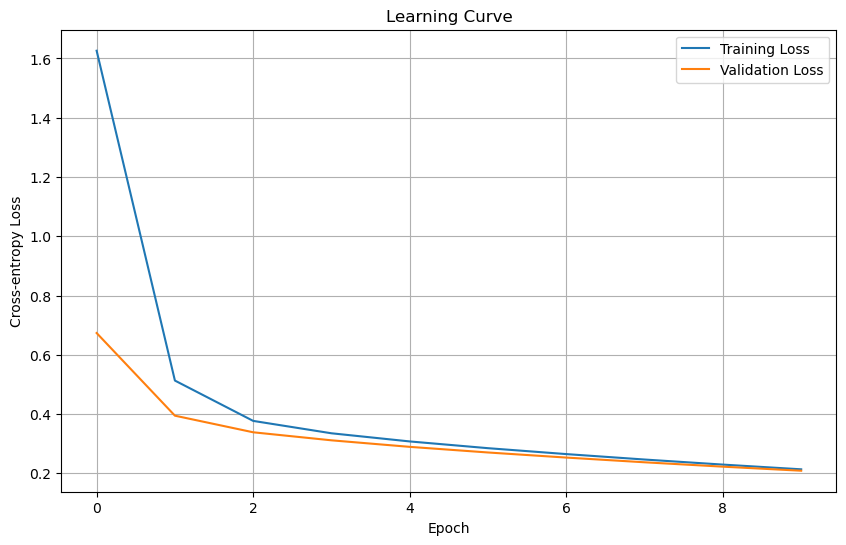

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

class GetMiniBatch:
    """
    Iterator to get mini-batches for training.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data.
    y : ndarray, shape (n_samples, n_output)
        Correct answer values (one-hot encoded).
    batch_size : int, default 20
        Batch size.
    seed : int, default 0
        Seed for NumPy random number generation.
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        batch_X = self._X[p0:p1]
        batch_y = self._y[p0:p1]
        self._counter += 1
        return batch_X, batch_y

def cross_entropy_error(y, Z):
    """
    Calculates the cross-entropy error (loss) for multi-class classification.

    Parameters
    ----------
    y : ndarray, shape (batch_size, n_output)
        One-hot encoded correct answer labels.
    Z : ndarray, shape (batch_size, n_output)
        Probability distribution of predictions from the output layer.

    Returns
    -------
    loss : float
        Average cross-entropy error over the batch.
    """
    batch_size = y.shape[0]
    epsilon = 1e-7
    loss = -np.sum(y * np.log(Z + epsilon)) / batch_size
    return loss

class ThreeLayerNeuralNetworkBackpropagation:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, learning_rate=0.01, activation='sigmoid'):
        """
        Initializes the three-layer neural network for backpropagation.

        Parameters
        ----------
        n_features : int
            Number of input features.
        n_nodes1 : int
            Number of nodes in the first hidden layer.
        n_nodes2 : int
            Number of nodes in the second hidden layer.
        n_output : int
            Number of output nodes (number of classes).
        learning_rate : float, default 0.01
            Learning rate for gradient descent.
        activation : str, default 'sigmoid'
            Activation function for the hidden layers ('sigmoid' or 'tanh').
        """
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate
        self.activation = activation
        self.W1 = np.random.randn(n_features, n_nodes1) * 0.01  # Weights for the first layer
        self.B1 = np.zeros(n_nodes1)                             # Biases for the first layer
        self.W2 = np.random.randn(n_nodes1, n_nodes2) * 0.01  # Weights for the second layer
        self.B2 = np.zeros(n_nodes2)                             # Biases for the second layer
        self.W3 = np.random.randn(n_nodes2, n_output) * 0.01   # Weights for the output layer
        self.B3 = np.zeros(n_output)                              # Biases for the output layer

    def sigmoid_derivative(self, Z):
        """
        Calculates the derivative of the sigmoid function.

        Parameters
        ----------
        Z : ndarray
            Output of the sigmoid function.

        Returns
        -------
        ndarray
            Derivative of the sigmoid function.
        """
        return Z * (1 - Z)

    def tanh_derivative(self, Z):
        """
        Calculates the derivative of the hyperbolic tangent function.

        Parameters
        ----------
        Z : ndarray
            Output of the tanh function.

        Returns
        -------
        ndarray
            Derivative of the tanh function.
        """
        return 1 - Z**2

    def forward(self, X):
        """
        Performs forward propagation through the network.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (batch_size, n_output)
            Output probabilities from the softmax layer.
        """
        self.A1 = X @ self.W1 + self.B1
        if self.activation == 'sigmoid':
            self.Z1 = 1 / (1 + np.exp(-self.A1))
        elif self.activation == 'tanh':
            self.Z1 = np.tanh(self.A1)
        else:
            raise ValueError("Invalid activation function.")

        self.A2 = self.Z1 @ self.W2 + self.B2
        if self.activation == 'sigmoid':
            self.Z2 = 1 / (1 + np.exp(-self.A2))
        elif self.activation == 'tanh':
            self.Z2 = np.tanh(self.A2)
        else:
            raise ValueError("Invalid activation function.")

        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = np.exp(self.A3) / np.sum(np.exp(self.A3), axis=1, keepdims=True)

        return self.Z3

    def backward(self, X, y):
        """
        Performs backpropagation to calculate gradients and update parameters.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data for the current batch.
        y : ndarray, shape (batch_size, n_output)
            One-hot encoded true labels for the current batch.
        """
        batch_size = X.shape[0]

        # Output layer
        dA3 = (self.Z3 - y) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3

        # Second layer
        dZ2 = dA3 @ self.W3.T
        if self.activation == 'sigmoid':
            dA2 = dZ2 * self.sigmoid_derivative(self.Z2)
        elif self.activation == 'tanh':
            dA2 = dZ2 * self.tanh_derivative(self.Z2)
        else:
            raise ValueError("Invalid activation function.")
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2

        # First layer
        dZ1 = dA2 @ self.W2.T
        if self.activation == 'sigmoid':
            dA1 = dZ1 * self.sigmoid_derivative(self.Z1)
        elif self.activation == 'tanh':
            dA1 = dZ1 * self.tanh_derivative(self.Z1)
        else:
            raise ValueError("Invalid activation function.")
        dB1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1

        # Update weights and biases (Stochastic Gradient Descent)
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def train(self, X_train, y_train, epochs=10, batch_size=20, X_val=None, y_val=None, verbose=True):
        """
        Trains the neural network and records training and validation loss.

        Parameters
        ----------
        X_train : ndarray, shape (n_samples, n_features)
            Training data features.
        y_train : ndarray, shape (n_samples, n_output)
            One-hot encoded training data labels.
        epochs : int, default 10
            Number of training epochs.
        batch_size : int, default 20
            Size of each mini-batch.
        X_val : ndarray, shape (n_val_samples, n_features), default None
            Validation data features.
        y_val : ndarray, shape (n_val_samples, n_output), default None
            One-hot encoded validation data labels.
        verbose : bool, default True
            Whether to print training progress.

        Returns
        -------
        history : dict
            A dictionary containing the training loss and validation loss per epoch.
        """
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=batch_size)
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            epoch_train_losses = []
            for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                # Forward propagation
                y_pred = self.forward(mini_X_train)

                # Backward propagation and parameter update
                self.backward(mini_X_train, mini_y_train)

                # Record training loss for this mini-batch
                loss = cross_entropy_error(mini_y_train, y_pred)
                epoch_train_losses.append(loss)

                if verbose and i % 100 == 0:
                    print(f"Epoch {epoch+1}, Mini-batch {i+1}, Loss: {loss:.4f}")

            # Calculate average training loss for the epoch
            train_loss = np.mean(epoch_train_losses)
            train_losses.append(train_loss)

            # Calculate validation loss at the end of the epoch
            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = cross_entropy_error(y_val, y_val_pred)
                val_losses.append(val_loss)
                accuracy = self.evaluate(X_val, y_val)
                if verbose:
                    print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}")
            elif verbose:
                print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}")

        history = {'train_loss': train_losses, 'val_loss': val_losses}
        return history

    def predict(self, X):
        """
        Predicts the class labels for the given input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels (integers).
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the accuracy of the model on the test data.

        Parameters
        ----------
        X_test : ndarray, shape (n_test_samples, n_features)
            Test data features.
        y_test : ndarray, shape (n_test_samples, n_output)
            One-hot encoded test data labels.

        Returns
        -------
        float
            Accuracy of the model on the test data.
        """
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
        return accuracy

if __name__ == '__main__':
    # Load MNIST data
    (X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
    X_train = X_train_raw.reshape(-1, 784) / 255.0
    X_test = X_test_raw.reshape(-1, 784) / 255.0

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(y_train_raw[:, np.newaxis]).toarray()
    y_test = enc.transform(y_test_raw[:, np.newaxis]).toarray()

    # Split training data into training and validation sets
    X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    # Instantiate the neural network
    nn = ThreeLayerNeuralNetworkBackpropagation(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, activation='tanh')

    # Train the network and get the training history
    history = nn.train(X_train_part, y_train_part, epochs=10, batch_size=20, X_val=X_val, y_val=y_val, verbose=True)

    # Evaluate on the test set
    accuracy = nn.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy:.4f}")

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(history['train_loss'], label='Training Loss')
    if history['val_loss']:
        plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross-entropy Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

##### 【Problem 8 】 (Advance Challenge) Confirm misclassification

Epoch 1, Mini-batch 1, Loss: 2.3021
Epoch 1, Mini-batch 101, Loss: 2.3010
Epoch 1, Mini-batch 201, Loss: 2.2908
Epoch 1, Mini-batch 301, Loss: 2.2931
Epoch 1, Mini-batch 401, Loss: 2.2850
Epoch 1, Mini-batch 501, Loss: 2.2697
Epoch 1, Mini-batch 601, Loss: 2.2652
Epoch 1, Mini-batch 701, Loss: 2.2626
Epoch 1, Mini-batch 801, Loss: 2.2129
Epoch 1, Mini-batch 901, Loss: 2.1991
Epoch 1, Mini-batch 1001, Loss: 2.1278
Epoch 1, Mini-batch 1101, Loss: 1.9009
Epoch 1, Mini-batch 1201, Loss: 1.8033
Epoch 1, Mini-batch 1301, Loss: 1.5649
Epoch 1, Mini-batch 1401, Loss: 1.5105
Epoch 1, Mini-batch 1501, Loss: 1.4797
Epoch 1, Mini-batch 1601, Loss: 1.5055
Epoch 1, Mini-batch 1701, Loss: 1.2595
Epoch 1, Mini-batch 1801, Loss: 0.8137
Epoch 1, Mini-batch 1901, Loss: 0.7933
Epoch 1, Mini-batch 2001, Loss: 0.9156
Epoch 1, Mini-batch 2101, Loss: 0.4880
Epoch 1, Mini-batch 2201, Loss: 0.4962
Epoch 1, Mini-batch 2301, Loss: 0.5646
Epoch 1 Training Loss: 1.6259, Validation Loss: 0.6736, Validation Accuracy:

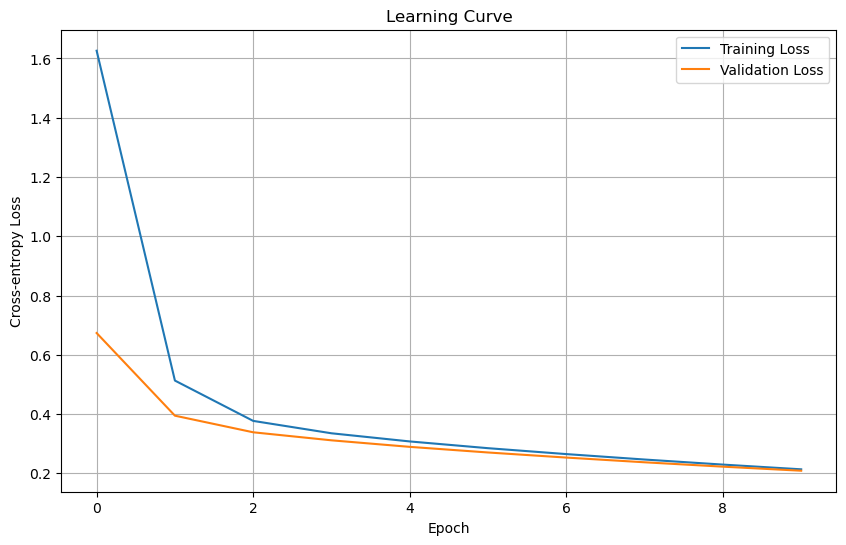

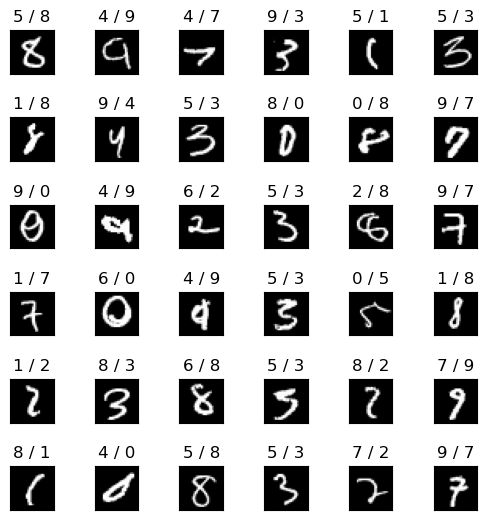

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

class GetMiniBatch:
    """
    Iterator to get mini-batches for training.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data.
    y : ndarray, shape (n_samples, n_output)
        Correct answer values (one-hot encoded).
    batch_size : int, default 20
        Batch size.
    seed : int, default 0
        Seed for NumPy random number generation.
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        batch_X = self._X[p0:p1]
        batch_y = self._y[p0:p1]
        self._counter += 1
        return batch_X, batch_y

def cross_entropy_error(y, Z):
    """
    Calculates the cross-entropy error (loss) for multi-class classification.

    Parameters
    ----------
    y : ndarray, shape (batch_size, n_output)
        One-hot encoded correct answer labels.
    Z : ndarray, shape (batch_size, n_output)
        Probability distribution of predictions from the output layer.

    Returns
    -------
    loss : float
        Average cross-entropy error over the batch.
    """
    batch_size = y.shape[0]
    epsilon = 1e-7
    loss = -np.sum(y * np.log(Z + epsilon)) / batch_size
    return loss

class ThreeLayerNeuralNetworkBackpropagation:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, learning_rate=0.01, activation='sigmoid'):
        """
        Initializes the three-layer neural network for backpropagation.

        Parameters
        ----------
        n_features : int
            Number of input features.
        n_nodes1 : int
            Number of nodes in the first hidden layer.
        n_nodes2 : int
            Number of nodes in the second hidden layer.
        n_output : int
            Number of output nodes (number of classes).
        learning_rate : float, default 0.01
            Learning rate for gradient descent.
        activation : str, default 'sigmoid'
            Activation function for the hidden layers ('sigmoid' or 'tanh').
        """
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate
        self.activation = activation
        self.W1 = np.random.randn(n_features, n_nodes1) * 0.01  # Weights for the first layer
        self.B1 = np.zeros(n_nodes1)                             # Biases for the first layer
        self.W2 = np.random.randn(n_nodes1, n_nodes2) * 0.01  # Weights for the second layer
        self.B2 = np.zeros(n_nodes2)                             # Biases for the second layer
        self.W3 = np.random.randn(n_nodes2, n_output) * 0.01   # Weights for the output layer
        self.B3 = np.zeros(n_output)                              # Biases for the output layer

    def sigmoid_derivative(self, Z):
        """
        Calculates the derivative of the sigmoid function.

        Parameters
        ----------
        Z : ndarray
            Output of the sigmoid function.

        Returns
        -------
        ndarray
            Derivative of the sigmoid function.
        """
        return Z * (1 - Z)

    def tanh_derivative(self, Z):
        """
        Calculates the derivative of the hyperbolic tangent function.

        Parameters
        ----------
        Z : ndarray
            Output of the tanh function.

        Returns
        -------
        ndarray
            Derivative of the tanh function.
        """
        return 1 - Z**2

    def forward(self, X):
        """
        Performs forward propagation through the network.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (batch_size, n_output)
            Output probabilities from the softmax layer.
        """
        self.A1 = X @ self.W1 + self.B1
        if self.activation == 'sigmoid':
            self.Z1 = 1 / (1 + np.exp(-self.A1))
        elif self.activation == 'tanh':
            self.Z1 = np.tanh(self.A1)
        else:
            raise ValueError("Invalid activation function.")

        self.A2 = self.Z1 @ self.W2 + self.B2
        if self.activation == 'sigmoid':
            self.Z2 = 1 / (1 + np.exp(-self.A2))
        elif self.activation == 'tanh':
            self.Z2 = np.tanh(self.A2)
        else:
            raise ValueError("Invalid activation function.")

        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = np.exp(self.A3) / np.sum(np.exp(self.A3), axis=1, keepdims=True)

        return self.Z3

    def backward(self, X, y):
        """
        Performs backpropagation to calculate gradients and update parameters.

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Input data for the current batch.
        y : ndarray, shape (batch_size, n_output)
            One-hot encoded true labels for the current batch.
        """
        batch_size = X.shape[0]

        # Output layer
        dA3 = (self.Z3 - y) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3

        # Second layer
        dZ2 = dA3 @ self.W3.T
        if self.activation == 'sigmoid':
            dA2 = dZ2 * self.sigmoid_derivative(self.Z2)
        elif self.activation == 'tanh':
            dA2 = dZ2 * self.tanh_derivative(self.Z2)
        else:
            raise ValueError("Invalid activation function.")
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2

        # First layer
        dZ1 = dA2 @ self.W2.T
        if self.activation == 'sigmoid':
            dA1 = dZ1 * self.sigmoid_derivative(self.Z1)
        elif self.activation == 'tanh':
            dA1 = dZ1 * self.tanh_derivative(self.Z1)
        else:
            raise ValueError("Invalid activation function.")
        dB1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1

        # Update weights and biases (Stochastic Gradient Descent)
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1

    def train(self, X_train, y_train, epochs=10, batch_size=20, X_val=None, y_val=None, verbose=True):
        """
        Trains the neural network and records training and validation loss.

        Parameters
        ----------
        X_train : ndarray, shape (n_samples, n_features)
            Training data features.
        y_train : ndarray, shape (n_samples, n_output)
            One-hot encoded training data labels.
        epochs : int, default 10
            Number of training epochs.
        batch_size : int, default 20
            Size of each mini-batch.
        X_val : ndarray, shape (n_val_samples, n_features), default None
            Validation data features.
        y_val : ndarray, shape (n_val_samples, n_output), default None
            One-hot encoded validation data labels.
        verbose : bool, default True
            Whether to print training progress.

        Returns
        -------
        history : dict
            A dictionary containing the training loss and validation loss per epoch.
        """
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=batch_size)
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            epoch_train_losses = []
            for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                # Forward propagation
                y_pred = self.forward(mini_X_train)

                # Backward propagation and parameter update
                self.backward(mini_X_train, mini_y_train)

                # Record training loss for this mini-batch
                loss = cross_entropy_error(mini_y_train, y_pred)
                epoch_train_losses.append(loss)

                if verbose and i % 100 == 0:
                    print(f"Epoch {epoch+1}, Mini-batch {i+1}, Loss: {loss:.4f}")

            # Calculate average training loss for the epoch
            train_loss = np.mean(epoch_train_losses)
            train_losses.append(train_loss)

            # Calculate validation loss and accuracy at the end of the epoch
            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = cross_entropy_error(y_val, y_val_pred)
                val_losses.append(val_loss)
                accuracy = self.evaluate(X_val, y_val)
                if verbose:
                    print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}")
            elif verbose:
                print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}")

        history = {'train_loss': train_losses, 'val_loss': val_losses}
        return history

    def predict(self, X):
        """
        Predicts the class labels for the given input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels (integers).
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the accuracy of the model on the test data.

        Parameters
        ----------
        X_test : ndarray, shape (n_test_samples, n_features)
            Test data features.
        y_test : ndarray, shape (n_test_samples, n_output)
            One-hot encoded test data labels.

        Returns
        -------
        float
            Accuracy of the model on the test data.
        """
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
        return accuracy

def plot_misclassified_images(y_pred, y_val, X_val):
    """
    Displays misclassified images along with their predicted and true labels.

    Parameters:
    ----------
    y_pred : ndarray, shape (n_samples,)
        Predicted labels.
    y_val : ndarray, shape (n_samples,)
        True labels.
    X_val : ndarray, shape (n_samples, n_features)
        Validation data features.
    """
    num = 36  # Number of misclassified images to display
    true_false = (y_pred == y_val)
    false_list = np.where(true_false == False)[0].astype(int)

    if false_list.shape[0] < num:
        num = false_list.shape[0]

    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)

    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]], y_val[false_list[i]]))
        ax.imshow(X_val[false_list[i]].reshape(28, 28), cmap='gray')
    plt.show()

if __name__ == '__main__':
    # Load MNIST data
    (X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
    X_train = X_train_raw.reshape(-1, 784) / 255.0
    X_test = X_test_raw.reshape(-1, 784) / 255.0

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train_onehot = enc.fit_transform(y_train_raw[:, np.newaxis]).toarray()
    y_test_onehot = enc.transform(y_test_raw[:, np.newaxis]).toarray()

    # Split training data into training and validation sets
    X_train_part, X_val, y_train_part, y_val_onehot = train_test_split(X_train, y_train_onehot, test_size=0.2, random_state=0)

    # Convert validation one-hot labels back to integer labels for evaluation and plotting
    y_val_int = np.argmax(y_val_onehot, axis=1)

    # Instantiate the neural network
    nn = ThreeLayerNeuralNetworkBackpropagation(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, activation='tanh')

    # Train the network
    history = nn.train(X_train_part, y_train_part, epochs=10, batch_size=20, X_val=X_val, y_val=y_val_onehot, verbose=True)

    # Make predictions on the validation set
    y_pred_onehot_val = nn.forward(X_val)
    y_pred_val = nn.predict(X_val)

    # Evaluate accuracy on the validation set
    accuracy_val = nn.evaluate(X_val, y_val_onehot)
    print(f"\nValidation Accuracy: {accuracy_val:.4f}")

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(history['train_loss'], label='Training Loss')
    if history['val_loss']:
        plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross-entropy Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Confirm misclassification by plotting misclassified images
    plot_misclassified_images(y_pred_val, y_val_int, X_val)